In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Load your dataset
df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\AirPassengers.csv", parse_dates=['Month'], index_col='Month')

# Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Check the data
df


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


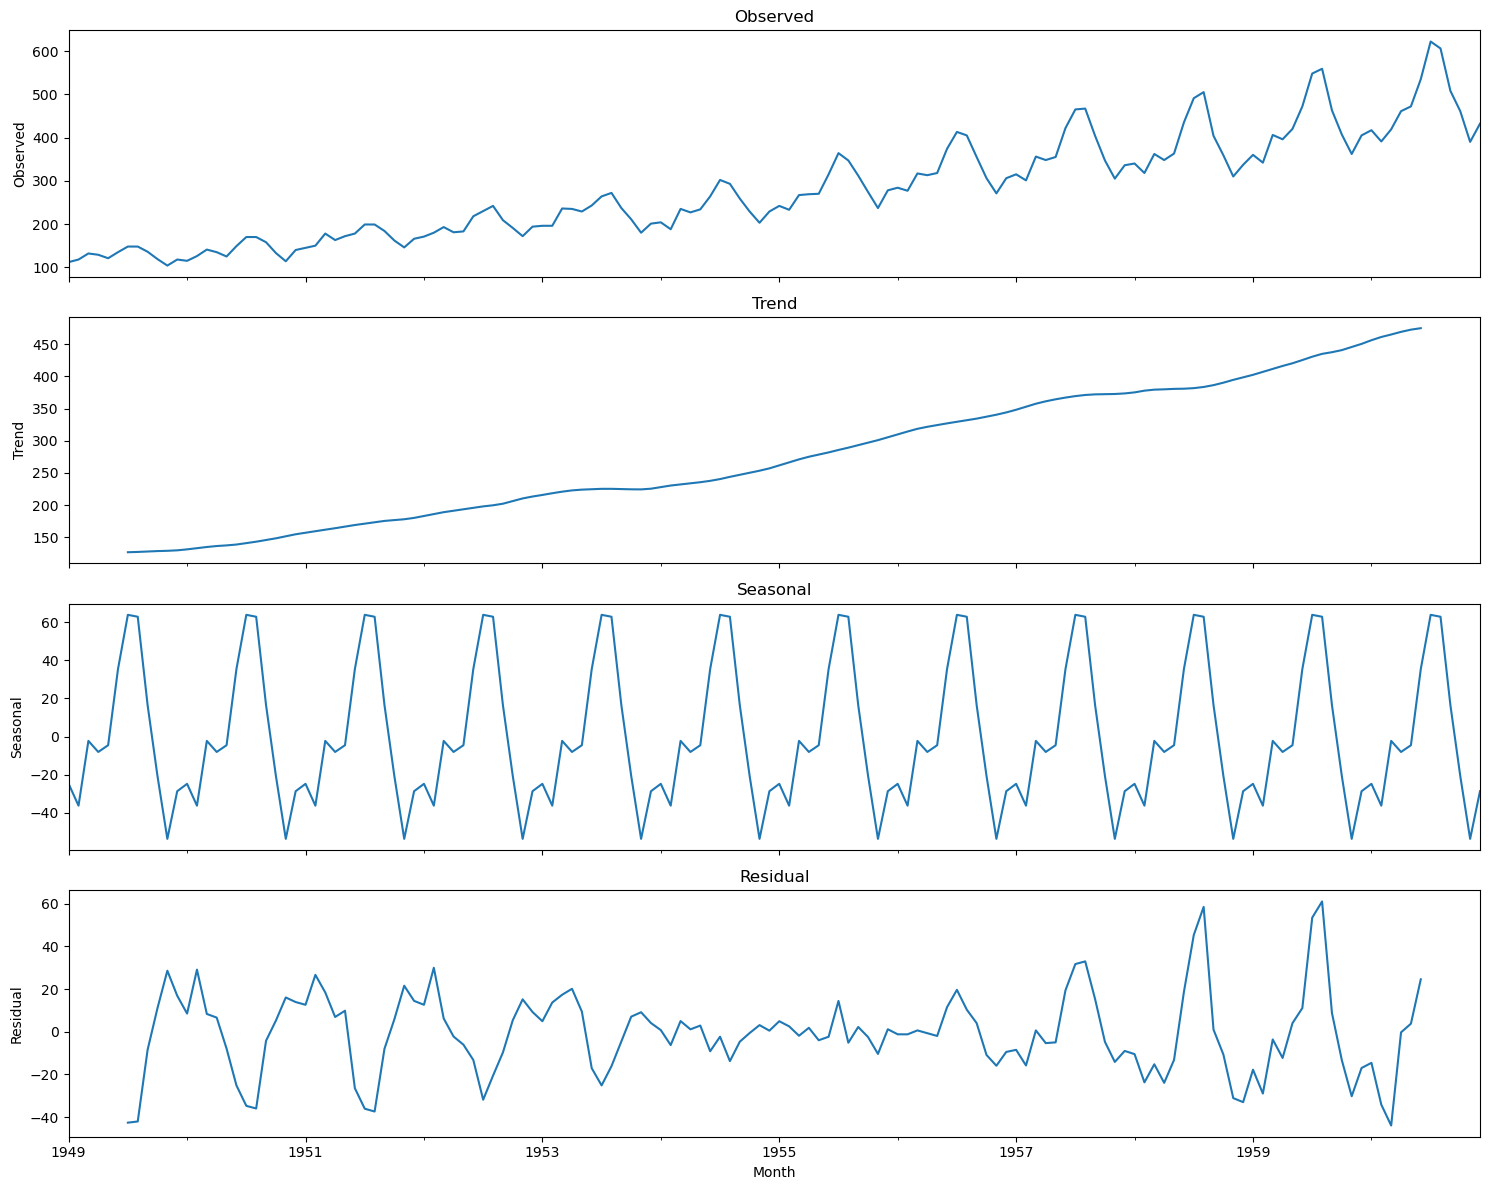

In [3]:
# Decompose the time series
result = seasonal_decompose(df['#Passengers'], model='additive') #period=12 by default 

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

result.observed.plot(ax=ax1, title='Observed')
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, title='Trend')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, title='Seasonal')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, title='Residual')
ax4.set_ylabel('Residual')
ax4.set_xlabel('Month')

plt.tight_layout()
plt.show()


In [4]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]



In [5]:
# Calculate Moving Average (SMA)
df['SMA3'] = df['#Passengers'].rolling(3).mean()

# Remove NULL values
df.dropna(inplace=True)

# Print DataFrame
df


,#Passengers,SMA3
Month,,
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
1949-06-01,135,128.333333
1949-07-01,148,134.666667
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000


<Axes: xlabel='Month'>

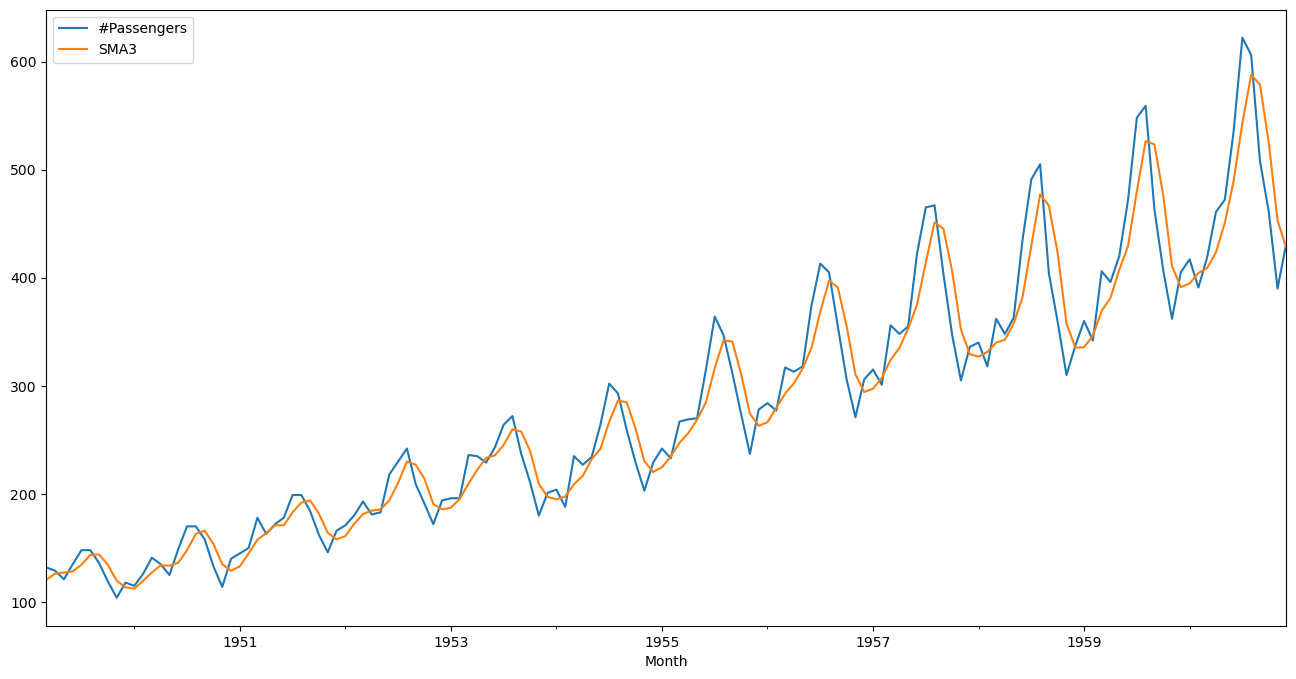

In [7]:
df[['#Passengers', 'SMA3']].plot(label='DF',figsize=(16, 8))

In [10]:
from scipy.ndimage import uniform_filter1d

moving_average = uniform_filter1d(df, size=3)

moving_average

array([[128.22222222, 124.44444444],
       [128.11111111, 127.22222222],
       [123.11111111, 125.22222222],
       [132.77777778, 130.55555556],
       [143.55555556, 139.11111111],
       [146.55555556, 145.11111111],
       [138.66666667, 141.33333333],
       [124.11111111, 129.22222222],
       [109.22222222, 114.44444444],
       [116.55555556, 115.11111111],
       [114.11111111, 113.22222222],
       [123.88888889, 121.77777778],
       [136.44444444, 131.88888889],
       [134.66666667, 134.33333333],
       [127.88888889, 130.77777778],
       [144.77777778, 140.55555556],
       [162.66666667, 155.33333333],
       [167.66666667, 165.33333333],
       [160.66666667, 163.33333333],
       [139.88888889, 146.77777778],
       [121.        , 128.        ],
       [136.33333333, 132.66666667],
       [141.        , 137.        ],
       [148.33333333, 146.66666667],
       [171.22222222, 164.44444444],
       [163.22222222, 163.44444444],
       [171.66666667, 171.33333333],
 